In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['Ultraworking - Lights Spreadsheet v1.2.gsheet',
 'Colab Notebooks',
 'Colab',
 'Multi-style_Image_Caption',
 'Anyfile Notepad Files',
 'Untitled0.ipynb',
 'saatt.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'spark-3.0.1-bin-hadoop3.2.tgz',
 'Big_Data_Processing',
 'ml-latest-small',
 'spark-3.0.1-bin-hadoop3.2',
 'sample_libsvm_data.txt',
 'Assessment_edited2',
 'Machine-Learning',
 'data',
 'gbr_predictions.txt',
 'mean_predictions.txt',
 'constant_predictions.txt',
 'dt_predictions.txt',
 'DecisionTree.ipynb',
 'lstm_predictions10.csv',
 'xgboost_predictions2.csv',
 'LSTM',
 'lstmcv_predictions_r.csv',
 'predictions.csv',
 'predictions_baseline.csv',
 'predictions_baseline128.csv',
 'predictions_baseline128_0.1.csv',
 'fold_5_best_model.h5',
 'fold_6_best_model.h5',
 'fold_7_best_model.h5',
 'fold_8_best_model.h5',
 'fold_9_best_model.h5',
 'predictions_baseline142_60_45.csv',
 'fold_2_best_model.h5',
 'fold_3_best_model.h5',
 'fold_4_best_model.h5',
 'fold_0_best_model.h5',
 'f

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
!pwd

/content/drive/My Drive


# Load Data

In [133]:
train = pd.read_csv('/content/drive/My Drive/ML-Diary-master/Linear Regression/house-prices-advanced-regression-techniques/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [92]:
test = pd.read_csv('/content/drive/My Drive/ML-Diary-master/Linear Regression/house-prices-advanced-regression-techniques/test.csv')

In [93]:
data = train.append(test).reset_index(drop=True).drop("Id", axis=1).drop("SalePrice", axis=1)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Correlation Analysis

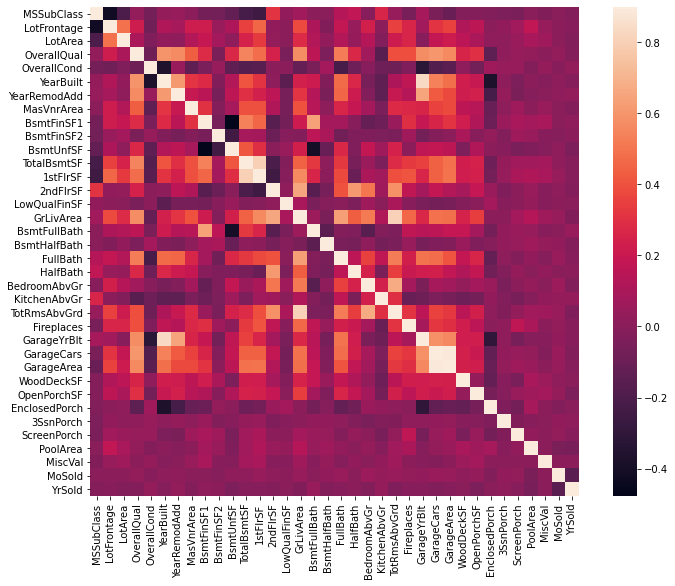

In [95]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

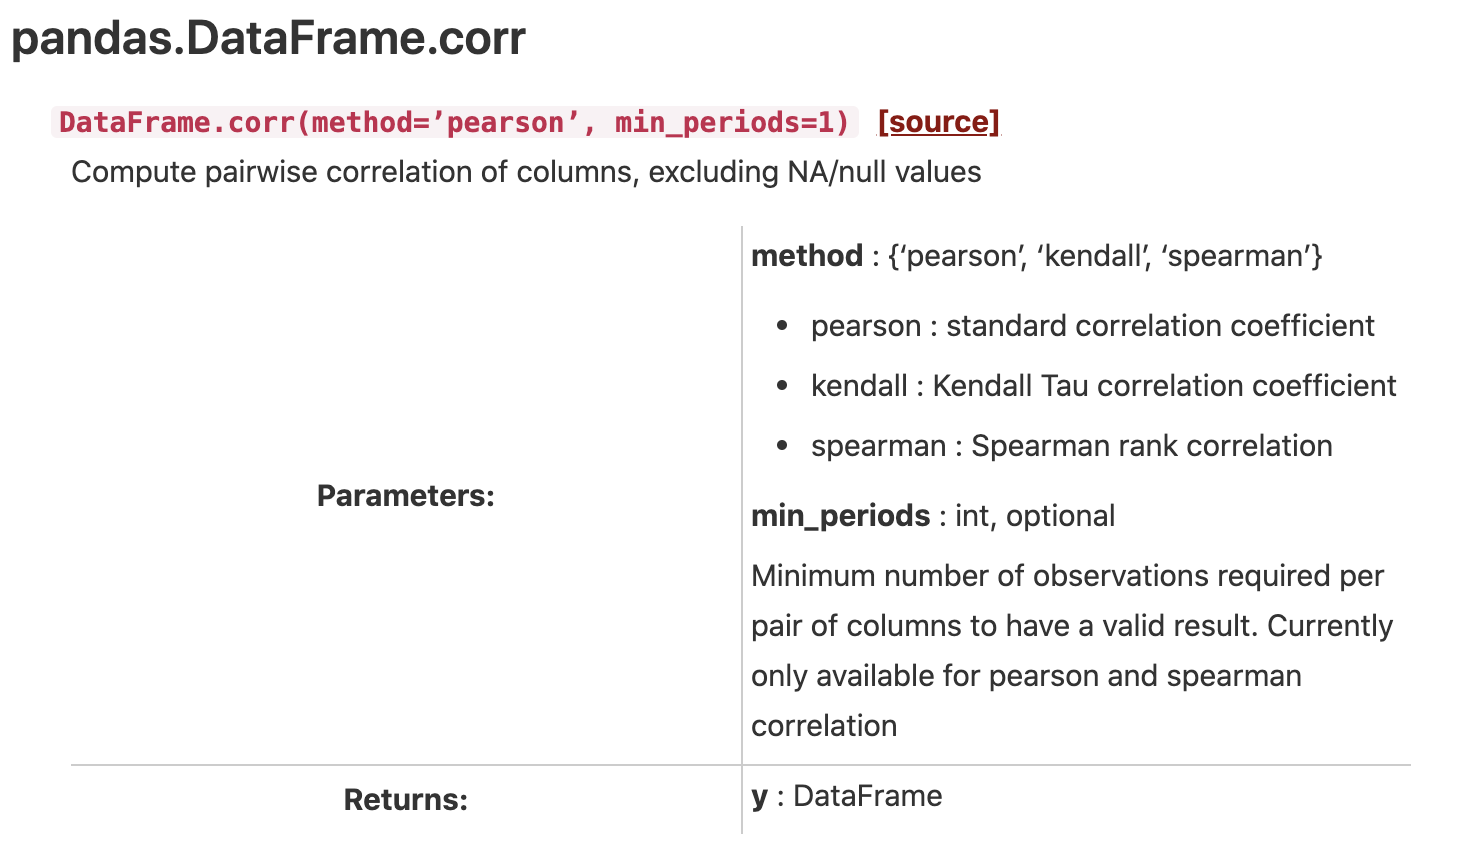

In [96]:
data.shape

(2919, 79)

In [97]:
data["PoolQC"] = data["PoolQC"].fillna("None")

In [98]:
data["MiscFeature"] = data["MiscFeature"].fillna("None")

In [99]:
data["Alley"] = data["Alley"].fillna("None")

In [100]:
data["Fence"] = data["Fence"].fillna("None")

In [101]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")

In [102]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [103]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

In [104]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

In [105]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [106]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

In [107]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [108]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

In [109]:
data = data.drop(['Utilities'], axis=1)

In [110]:
data["Functional"] = data["Functional"].fillna("Typ")

In [111]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [112]:
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])


In [113]:
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

In [114]:
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [115]:
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [116]:
#Check remaining missing values if any 
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio


In [117]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970

In [118]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [119]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape data: {}'.format(data.shape))

Shape data: (2919, 78)


In [120]:
data['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
2914    RM
2915    RM
2916    RL
2917    RL
2918    RL
Name: MSZoning, Length: 2919, dtype: object

In [121]:
from sklearn.preprocessing import LabelEncoder
cols = ('Neighborhood', 'MSZoning', 'Condition1', 'LandContour', 'LotConfig', 'RoofStyle', 'Exterior2nd', 'Condition2', 'BldgType', 'HouseStyle', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior1st', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape data: {}'.format(data.shape))

Shape data: (2919, 78)


In [122]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,3,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,4,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706.0,6,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,1,0,4,2,8,4
1,5,3,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,1,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,1,0,7,1,8,4
2,10,3,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,4,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486.0,6,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,1,0,11,2,8,4
3,11,3,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,4,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216.0,6,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,1,0,4,0,8,0
4,10,3,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,4,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,1,0,3,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2,4,21.0,1936,1,1,3,3,4,0,10,2,2,3,5,4,6,1970,1970,1,1,5,5,2,0.0,3,4,1,4,4,3,6,0.0,6,0.0,546.0,546.0,1,2,1,4,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,6,0.0,1,0.0,0.0,3,3,2,0,0,0,0,0,0,3,4,1,0,8,0,8,4
2915,2,4,21.0,1894,1,1,3,3,4,0,10,2,2,4,5,4,4,1970,1970,1,1,5,5,2,0.0,3,4,1,4,4,3,5,252.0,6,0.0,294.0,546.0,1,4,1,4,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,4,1970.0,3,1.0,286.0,5,5,2,0,24,0,0,0,0,3,4,1,0,6,0,8,0
2916,5,3,160.0,20000,1,1,3,3,4,0,11,2,2,0,2,5,6,1960,1996,1,1,12,13,2,0.0,3,4,1,4,4,3,0,1224.0,6,0.0,0.0,1224.0,1,0,1,4,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,5,1960.0,3,2.0,576.0,5,5,2,474,0,0,0,0,0,3,4,1,0,11,0,8,0
2917,14,3,62.0,10441,1,1,3,3,4,0,11,2,2,0,6,5,4,1992,1992,1,1,6,15,2,0.0,3,4,2,2,4,0,2,337.0,6,0.0,575.0,912.0,1,4,1,4,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,6,0.0,1,0.0,0.0,3,3,2,80,32,0,0,0,0,3,2,3,700,9,0,8,4


In [124]:
head = data.columns.values

In [126]:
for c in head:
    data[c] = np.log1p(data[c])
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2.397895,1.386294,4.189655,9.042040,0.693147,0.693147,1.386294,1.386294,1.609438,0.000000,1.791759,1.098612,1.098612,0.000000,1.791759,2.079442,1.609438,7.602900,7.602900,0.693147,0.693147,2.564949,2.639057,0.693147,5.283204,1.098612,1.609438,1.098612,1.098612,1.609438,1.386294,1.098612,6.561031,1.94591,0.0,5.017280,6.753438,0.693147,0.000000,0.693147,1.609438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.098612,2.197225,1.94591,0.000000,1.386294,0.693147,7.602900,1.098612,1.098612,6.308098,1.791759,1.791759,1.098612,0.000000,4.127134,0.000000,0.0,0.0,0.0,1.386294,1.609438,0.693147,0.000000,1.609438,1.098612,2.197225,1.609438
1,1.791759,1.386294,4.394449,9.169623,0.693147,0.693147,1.386294,1.386294,1.098612,0.000000,3.218876,0.693147,1.098612,0.000000,1.098612,1.945910,2.079442,7.589336,7.589336,0.693147,0.693147,2.197225,2.197225,1.098612,0.000000,1.386294,1.609438,0.693147,1.098612,1.609438,0.693147,0.000000,6.886532,1.94591,0.0,5.652489,7.141245,0.693147,0.000000,0.693147,1.609438,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.386294,1.945910,1.94591,0.693147,1.791759,0.693147,7.589336,1.098612,1.098612,6.133398,1.791759,1.791759,1.098612,5.700444,0.000000,0.000000,0.0,0.0,0.0,1.386294,1.609438,0.693147,0.000000,2.079442,0.693147,2.197225,1.609438
2,2.397895,1.386294,4.234107,9.328212,0.693147,0.693147,0.000000,1.386294,1.609438,0.000000,1.791759,1.098612,1.098612,0.000000,1.791759,2.079442,1.609438,7.601902,7.602401,0.693147,0.693147,2.564949,2.639057,0.693147,5.093750,1.098612,1.609438,1.098612,1.098612,1.609438,1.098612,1.098612,6.188264,1.94591,0.0,6.075346,6.825460,0.693147,0.000000,0.693147,1.609438,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.098612,1.945910,1.94591,0.693147,1.791759,0.693147,7.601902,1.098612,1.098612,6.411818,1.791759,1.791759,1.098612,0.000000,3.761200,0.000000,0.0,0.0,0.0,1.386294,1.609438,0.693147,0.000000,2.484907,1.098612,2.197225,1.609438
3,2.484907,1.386294,4.110874,9.164401,0.693147,0.693147,0.000000,1.386294,0.000000,0.000000,1.945910,1.098612,1.098612,0.000000,1.791759,2.079442,1.609438,7.557995,7.586296,0.693147,0.693147,2.639057,2.772589,1.098612,0.000000,1.386294,1.609438,0.000000,1.609438,0.693147,1.386294,0.000000,5.379897,1.94591,0.0,6.293419,6.629363,0.693147,1.098612,0.693147,1.609438,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,1.098612,2.079442,1.94591,0.693147,1.098612,1.791759,7.600402,1.386294,1.386294,6.466145,1.791759,1.791759,1.098612,0.000000,3.583519,5.609472,0.0,0.0,0.0,1.386294,1.609438,0.693147,0.000000,1.609438,0.000000,2.197225,0.000000
4,2.397895,1.386294,4.442651,9.565284,0.693147,0.693147,0.000000,1.386294,1.098612,0.000000,2.772589,1.098612,1.098612,0.000000,1.791759,2.197225,1.609438,7.601402,7.601402,0.693147,0.693147,2.564949,2.639057,0.693147,5.860786,1.098612,1.609438,1.098612,1.098612,1.609438,0.000000,1.098612,6.486161,1.94591,0.0,6.196444,7.044033,0.693147,0.000000,0.693147,1.609438,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,1.098612,

In [130]:
train_data = data[:len(train)]
test_data = data[:len(test)]

In [136]:
train_y = train['SalePrice']

target = np.log1p(train_y)
mu = target.mean()
std = target.std()
target = (target - mu) / std

In [139]:
train_data.shape

(1460, 78)

In [156]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

LR = LinearRegression()
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [183]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train_data.values, target, scoring="neg_mean_squared_error", cv = kf))
    pred = model.predict(tes)
    return(rmse)

In [194]:
LR = LinearRegression()
LR.fit(train_data,target)
ENet.fit(train_data,target)
GBoost.fit(train_data,target)
KRR.fit(train_data,target)
lasso.fit(train_data,target)
p1 = LR.predict(test_data)
p2 = ENet.predict(test_data)
p3 = GBoost.predict(test_data)
p4 = KRR.predict(test_data)
p5 = lasso.predict(test_data)

In [195]:
p1 = np.expm1(p1 * std + mu)
p2 = np.expm1(p2 * std + mu)
p3 = np.expm1(p3 * std + mu)
p4 = np.expm1(p4 * std + mu)
p5 = np.expm1(p5 * std + mu)

In [197]:
preds = (p1+p2+p3+p4+p5)/5

In [198]:
preds

array([207449.48280545, 187302.95143906, 222925.63873107, ...,
       213044.58171992, 245479.85270207, 135795.1004516 ])

In [199]:
eval_data = pd.read_csv('/content/drive/My Drive/ML-Diary-master/Linear Regression/house-prices-advanced-regression-techniques/test.csv')
import csv

with open("LRegression.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["ID", "SalePrice"])
    for index, prediction in enumerate(preds):
        writer.writerow([str(eval_data['Id'].iloc[index]) , str(int(prediction))])